In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
import numpy as np

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedbenmaiza","key":"7637731167f99e3dab4d2e484909135d"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15352  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9340  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4173  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3417  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [8]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 8.14MB/s]


In [9]:
!unzip heart-attack-analysis-prediction-dataset

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [10]:
import pandas as pd

In [124]:
data_heart=pd.read_csv("/content/heart.csv")

In [12]:
data_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data_heart.shape

(303, 14)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
data_heart['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'thalachh')

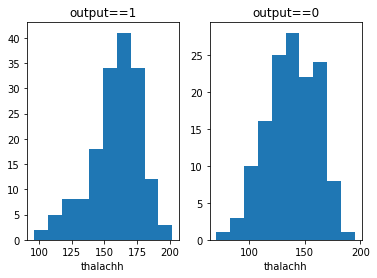

In [17]:
plt.subplot(1,2,1)


plt.hist(data_heart.loc[data_heart['output']==1,"thalachh"])
plt.xlabel("thalachh")
plt.title("output==1")

plt.subplot(1,2,2)


plt.hist(data_heart.loc[data_heart['output']==0,"thalachh"])
plt.title("output==0")
plt.xlabel("thalachh")

Text(0.5, 1.0, 'Heart attack by resting blood pressure (in mm Hg)')

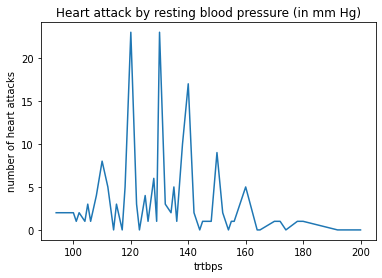

In [18]:
a=data_heart[["trtbps","output"]].groupby(pd.Grouper(key="trtbps")).sum()
a.sort_index(inplace=True)

plt.plot(a.index,a['output'])
plt.xlabel("trtbps")
plt.ylabel("number of heart attacks")
plt.title("Heart attack by resting blood pressure (in mm Hg)")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


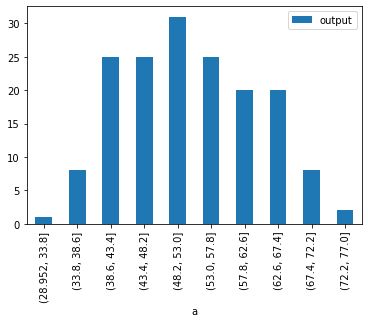

In [19]:
a=data_heart[["age","output"]]
a.sort_index(inplace=True)

a["a"]=pd.cut(a.age,bins=10)

a = a[['a','output']].groupby('a').sum()
a.plot(kind='bar')

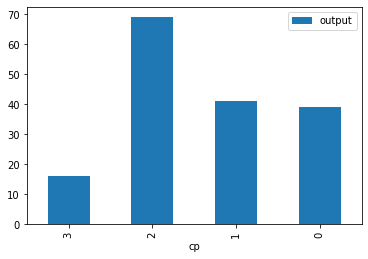

In [20]:
a=data_heart[["cp","output"]]
a.sort_index(inplace=True)
a=a.groupby(pd.Grouper(key="cp")).sum()
a.plot(kind='bar')

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [126]:
X=data_heart.iloc[:,:-1].to_numpy()
Y=data_heart.iloc[:,13].to_numpy()

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [127]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [129]:
model=Sequential([
                  Dense(32,input_dim=13,activation="relu"),
                  Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                448       
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [131]:
callback=tf.keras.callbacks.EarlyStopping(patience=3)

In [132]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=16,callbacks=[callback])

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 0.6984 - accuracy: 0.4959 - val_loss: 0.5991 - val_accuracy: 0.7541
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.7066 - val_loss: 0.5463 - val_accuracy: 0.8197
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5646 - accuracy: 0.7562 - val_loss: 0.5041 - val_accuracy: 0.8525
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.7851 - val_loss: 0.4752 - val_accuracy: 0.8525
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4857 - accuracy: 0.8017 - val_loss: 0.4498 - val_accuracy: 0.8525
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4587 - accuracy: 0.8058 - val_loss: 0.4286 - val_accuracy: 0.8033
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8099 - val_loss: 0.4107 - val_accuracy: 0.8197
Epoch 8/100


In [133]:
y=model.predict(X_test)

In [134]:
y=[1 if i>0.5 else 0 for  i in y]

In [135]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
import matplotlib.pyplot as plt


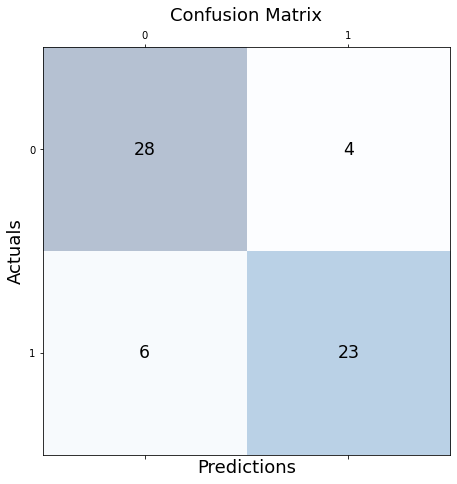

In [136]:
conf_matrix=confusion_matrix(y_test,y)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [140]:
print("f1-score: ",precision_recall_fscore_support(y_test,y,average="micro")[2])

f1-score:  0.8360655737704918
